### First import the list of super markets by cordinates
Data from https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores

In [2]:
import pandas as pd
smList = pd.read_csv("data-conveniencesupermarkets.csv", index_col="Client ID")
smList

,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
Client ID,,,,,,,,,,,
201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store
...,...,...,...,...,...,...,...,...,...,...,...
201210250002,Aldi #80,Aldi Inc,5/8/2013,5631,Baum Blvd,PA,15213.0,40.458291,-79.935066,9.0,Supermarket
201304250008,Wal-Mart #2603,Wal-Mart Stores Inc,1/14/2000,300,Wal-Mart Dr,PA,15044.0,40.623006,-79.946578,9.0,Supermarket
200001280001,Wal-Mart #5040,Wal-Mart Stores Inc,2/19/2008,2200,Washington Pi,PA,15106.0,40.173242,-80.241990,9.0,Supermarket


## Next find the neighborhood based on the cordinates
Using the code snippets uploaded on canvas

In [3]:
import fpsnippets

#making sure it works

print("lat:", lat := smList.loc[['201210250002']]["Lat"].values[0])
print("lon:", lon := smList.loc[['201210250002']]["Lon"].values[0])
print(fpsnippets.geo_to_neighborhood(lat, lon))

lat: 40.458291
lon: -79.935066
Friendship


## Next count the amount of stores in each neighborhood
Stores that are not in a neighborhood on the list and return None are not counted

In [4]:
smCount = {}

for index, row in smList.iterrows():
    ngh = fpsnippets.geo_to_neighborhood(row["Lat"], row["Lon"])
    if ngh == None:
        continue
    if ngh in smCount:
        smCount[ngh] += 1
    else:
        smCount[ngh] = 1

print(smCount)

{'Lincoln Place': 3, 'Central Business District': 17, 'South Shore': 1, 'Homewood South': 3, 'Greenfield': 5, 'Northview Heights': 1, 'Shadyside': 9, 'East Hills': 1, 'Terrace Village': 2, 'Squirrel Hill South': 5, 'Spring Garden': 3, 'Strip District': 9, 'South Side Flats': 8, 'Garfield': 2, 'Troy Hill': 3, 'Brookline': 7, 'Central Oakland': 6, 'Upper Lawrenceville': 2, 'North Oakland': 5, 'Chateau': 1, 'Crawford-Roberts': 4, 'Central Northside': 3, 'Polish Hill': 1, 'Morningside': 2, 'Middle Hill': 2, 'Bloomfield': 11, 'Carrick': 9, 'Summer Hill': 1, 'Banksville': 2, 'Highland Park': 1, 'Perry North': 1, 'Central Lawrenceville': 2, 'Arlington': 1, 'Marshall-Shadeland': 4, 'Lower Lawrenceville': 2, 'Mount Washington': 5, 'South Oakland': 1, 'Allentown': 1, 'East Allegheny': 4, 'Westwood': 2, 'Bluff': 4, 'Homewood West': 1, 'Point Breeze': 1, 'East Liberty': 4, 'Larimer': 4, 'Homewood North': 1, 'Sheraden': 1, 'Upper Hill': 1, 'Beltzhoover': 2, 'Friendship': 2, 'Esplen': 1, 'Spring Hil

In [5]:
import json

with open('supermarkets.json', 'w') as fp:
    json.dump(smCount, fp)

## Conclusion
Some of the stores on the list were not in a valid neighborhood. However there are enough for the purposes of this project. The best neighborhood for our purposes would be the Central Business District.

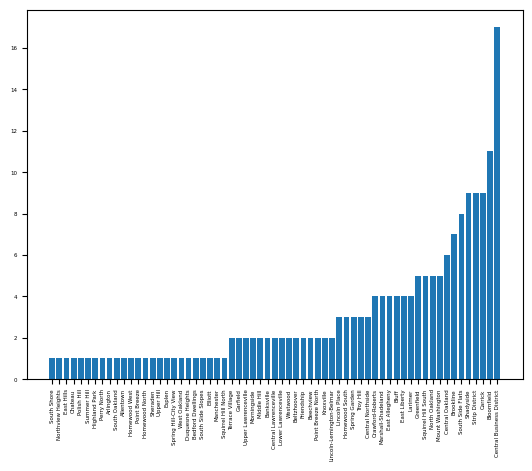

In [6]:
import matplotlib.pyplot as plt


sortedData = dict(sorted(smCount.items(), key=lambda item: item[1]))
plt.rcParams.update({'font.size': 4})

plt.bar(*zip(*sortedData.items()))
plt.xticks(rotation = 90)
plt.show()